# Étude des **NaN**

## Objectif

Approfondir l'exploration des NaN afin de déterminer la meilleure façon de les gérer

## Sommaire

1. Initialisation
2. Chiffrage
3. Visualisation globale
4. Hypothèse
5. Visualisation spatiale
6. Visualisation temporelle
7. Visualisation spatio-temporelle
8. Résultats
9. Recommandations

## 1. Initialisation

In [1]:
# Importation des bibliothèques et modules nécessaires au fonctionnement de ce notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import missingno as msno ## Missing data visualization module for Python; installed using Anaconda

In [2]:
# Définition des paramètres esthétiques généraux

%matplotlib inline
sns.set_theme(style = "whitegrid", palette = "bright")

In [3]:
# Importation du jeu de données et enregistrement dans le DataFrame `df`

df = pd.read_csv("../data/raw/weatherAUS.csv")

In [4]:
# Calcul et enregistrement du nombre maximal de jours dans la variable `max_day_count`

max_day_count = df.groupby("Location").nunique().max(axis = 0).loc["Date"]
max_day_count

3436

In [5]:
# Calcul et enregistrement du nombre de stations météorologiques dans la variable `location_count`

location_count = len(df["Location"].unique())
location_count

49

## 2. Chiffrage

In [6]:
# Calcul et affichage du pourcentage de NaN dans chaque colonne par ordre décroissant

print("Pourcentage de NaN dans chaque colonne par ordre décroissant :")

np.round(df.isna().sum() / df.shape[0] * 100, decimals = 2).sort_values(ascending = False)

Pourcentage de NaN dans chaque colonne par ordre décroissant :


Sunshine         48.01
Evaporation      43.17
Cloud3pm         40.81
Cloud9am         38.42
Pressure9am      10.36
Pressure3pm      10.33
WindDir9am        7.26
WindGustDir       7.10
WindGustSpeed     7.06
Humidity3pm       3.10
WindDir3pm        2.91
Temp3pm           2.48
RainTomorrow      2.25
Rainfall          2.24
RainToday         2.24
WindSpeed3pm      2.11
Humidity9am       1.82
Temp9am           1.21
WindSpeed9am      1.21
MinTemp           1.02
MaxTemp           0.87
Location          0.00
Date              0.00
dtype: float64

Ces premiers résultats mettent en évidence le fait que les 4 variables explicatives suivantes contiennent environ 40% de NaN :
- `Sunshine`
- `Evaporation`
- `Cloud9am`
- `Cloud3pm`

Appelons-les les variables « gruyère », et regardons-les de plus près.

## 3. Visualisation globale

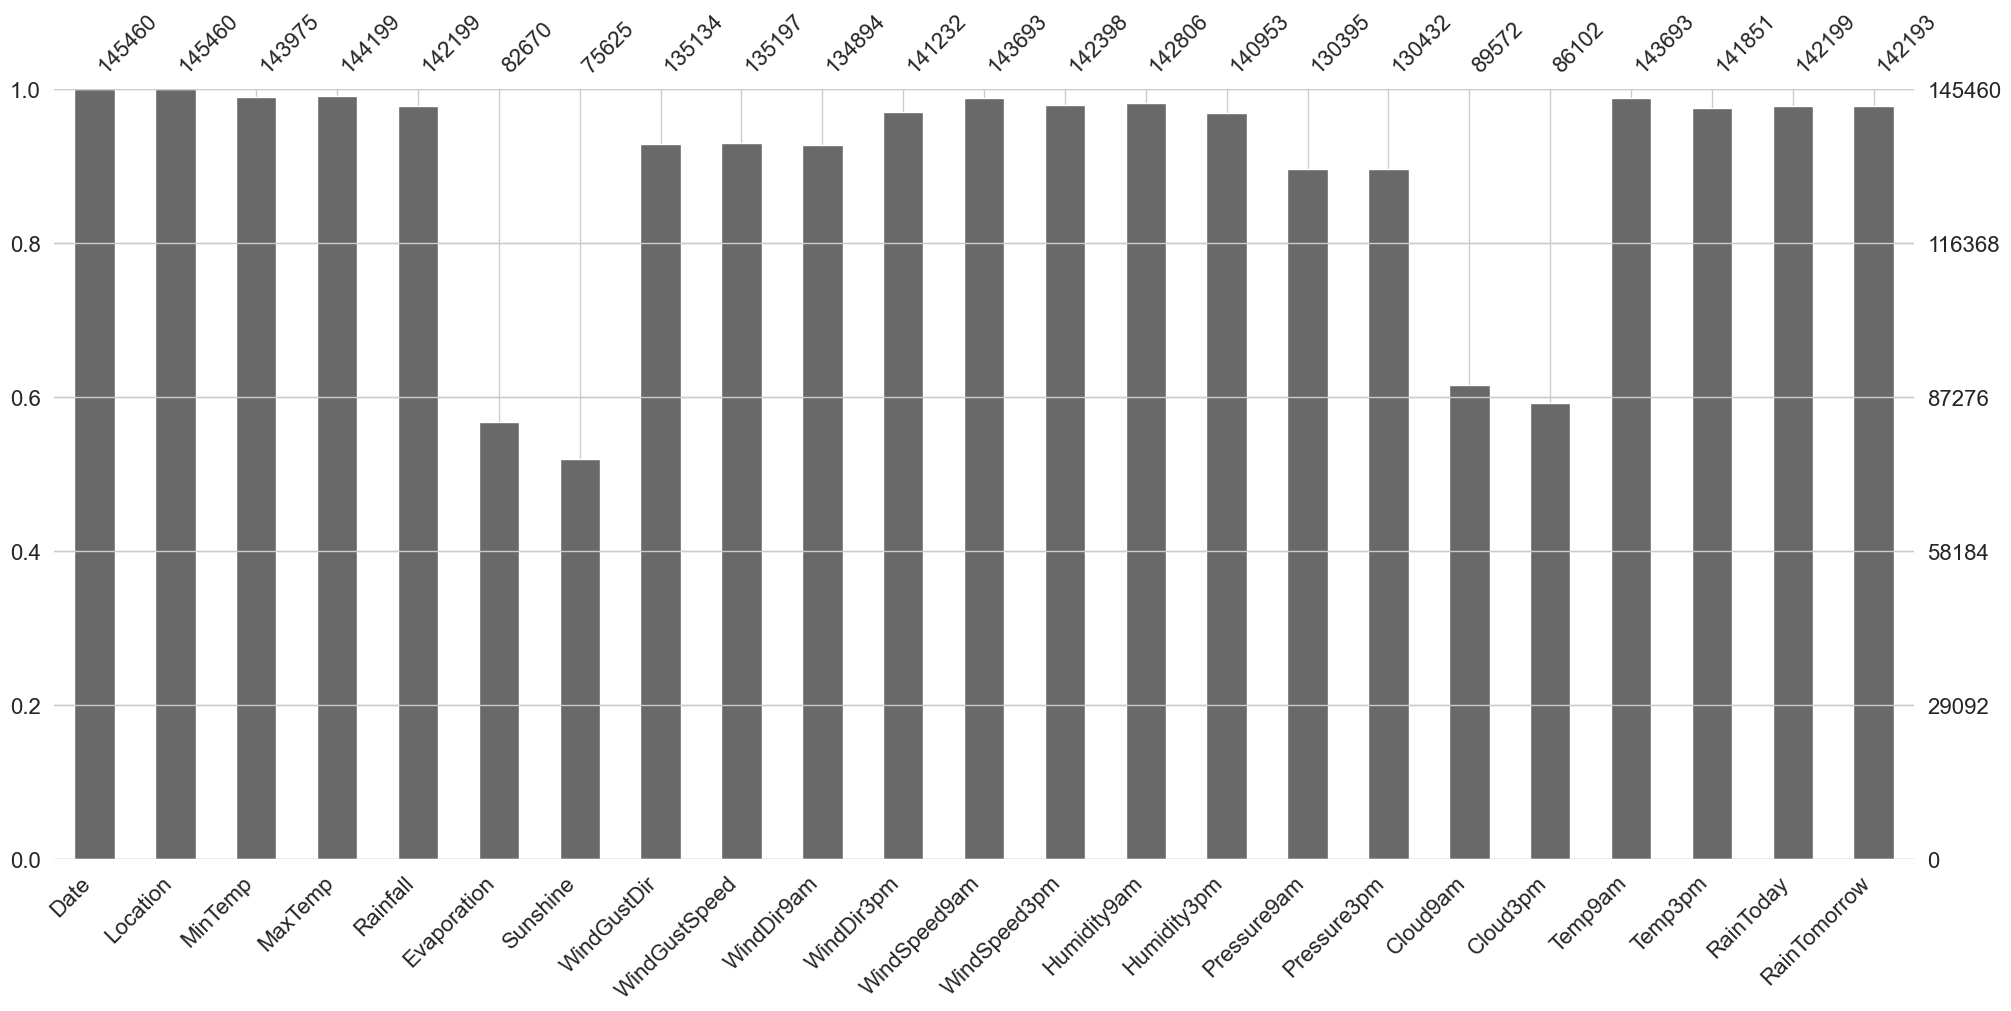

In [7]:
# Visualisation des NaN de tout le jeu de données

msno.bar(df);

Les 4 variables gruyère ressortent clairement dans le graphique ci-dessus.

## 4. Hypothèse

Mis à part `Date` et `Location`, le reste des variables représente des paramètres météorologiques établis pour un jour donné par une station donnée (valeurs justement représentées par `Date` et `Location`).

En partant de cette base, nous pouvons émettre l'hypothèse suivante : **les 21 variables météorologiques varient en fonction de la date et du lieu d'enregistrement des données.**

Si cette hypothèse est vraie, le fort taux de NaN observé pour les 4 variables gruyère devrait être attribuable à des phénomènes spécifiques liés à la date et au lieu d'enregistrement des données.

Nous testons cette hypothèse dans la suite de l'étude en observant le comportement des 4 variables gruyère dans l'espace, dans le temps et dans les deux dimensions unies.

## 5. Visualisation spatiale

In [8]:
# Décompte des NaN dans les 4 variables gruyère en fonction de la station météorologique

## Création du nouveau DataFrame `df_location` contenant uniquement la colonne `Location`
df_location = df[["Location"]]

## Création du nouveau DataFrame `df_gruyere` contenant uniquement les 4 variables gruyère
df_gruyere = df[["Evaporation", "Sunshine", "Cloud9am", "Cloud3pm"]]

## Détection des NaN dans `df_gruyere`, binarisation et sauvegarde dans le nouveau DataFrame `df_gruyere_isna`
df_gruyere_isna = df_gruyere.isna().astype(int)

## Concaténation de `df_location` et `df_gruyere_isna` dans le nouveau DataFrame `df_location_gruyere_isna`
df_location_gruyere_isna = pd.concat([df_location, df_gruyere_isna], axis = 1)

## Regroupement des données par station météorologique et calcul du nombre total de NaN pour chaque variable gruyère
df_location_gruyere_isna_counts = df_location_gruyere_isna.groupby("Location").sum()

## Affichage des résultats absolus
df_location_gruyere_isna_counts

,Evaporation,Sunshine,Cloud9am,Cloud3pm
Location,,,,
Adelaide,1489,1424,3193,3193
Albany,290,520,38,711
Albury,3040,3040,1751,1613
AliceSprings,215,520,334,361
BadgerysCreek,3009,3009,3009,3009
Ballarat,3040,3040,546,1048
Bendigo,1855,3040,968,772
Brisbane,19,49,1,2
Cairns,370,476,207,230


In [9]:
# OC, 26/10 : utilisation de max_day_count à revoir. La normalisation de chaque variable doit être faite sur le nombre total de jours pour lesquels elle a des données, et non sur le nombre maximal de jours.

# Décompte des NaN dans les 4 variables gruyère en fonction de la station météorologique

## Rapport des résultats au nombre maximal de jours
## df_location_gruyere_isna_count_rate = np.round(df_location_gruyere_isna_counts / max_day_count * 100, decimals = 2)

## Affichage des résultats relatifs
## df_location_gruyere_isna_count_rate

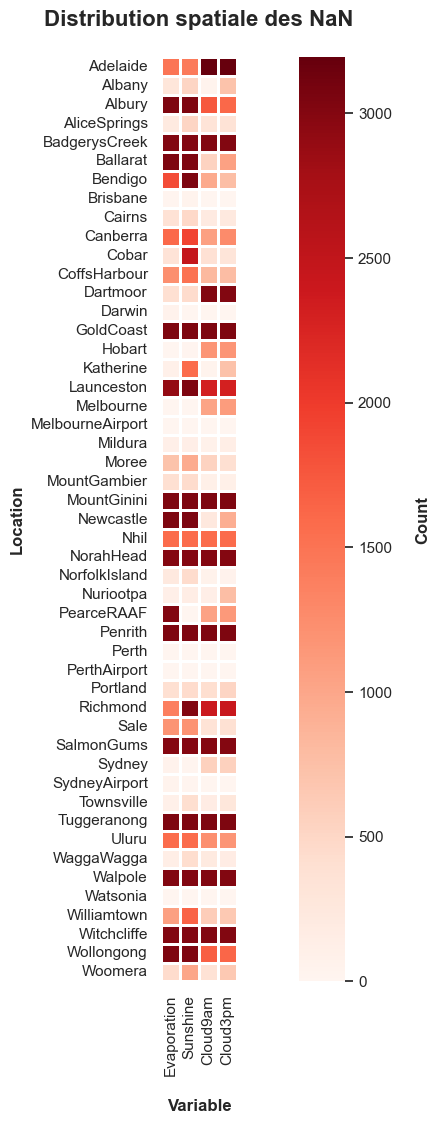

In [10]:
# Illustration des NaN dans les 4 variables gruyère en fonction de la station météorologique

## Initialisation de la toile
plt.figure(figsize = (16, 12))

## Traçage
ax = sns.heatmap(df_location_gruyere_isna_counts, 
                 square = True, 
                 linewidth = 1, 
                 cmap = "Reds", 
                 cbar_kws = {"label": "\nCount"})

## Mise en forme
plt.title("Distribution spatiale des NaN\n", fontweight = "bold", fontsize = 16)
plt.xlabel("\nVariable", fontweight = "bold")
plt.ylabel("Location", fontweight = "bold")
cbar_axes = ax.figure.axes[-1].yaxis.label.set_weight("bold");

À partir des résultats ci-dessus, nous pouvons observer que certaines stations météorologiques ont plus de 3000 de NaN pour certaines, voire l'ensemble, des 4 variables gruyère.

Regardons maintenant la répartition de ces variables dans le temps.

## 6. Visualisation temporelle

In [11]:
# Décompte des NaN dans les 4 variables gruyère en fonction de la date

## Création du nouveau DataFrame `df_date` contenant uniquement la colonne `Date`
df_date = pd.to_datetime(df["Date"])

## Concaténation de `df_date` et `df_gruyere_isna` dans le nouveau DataFrame `df_date_gruyere_isna`
df_date_gruyere_isna = pd.concat([df_date, df_gruyere_isna], axis = 1)

## Regroupement des données par date et calcul du nombre total de NaN pour chaque variable gruyère
df_date_gruyere_isna_counts = df_date_gruyere_isna.groupby("Date").sum()

## Affichage des résultats absolus
df_date_gruyere_isna_counts

,Evaporation,Sunshine,Cloud9am,Cloud3pm
Date,,,,
2007-11-01,0,0,0,0
2007-11-02,0,0,0,0
2007-11-03,0,0,0,0
2007-11-04,0,0,0,0
2007-11-05,0,0,0,0
...,...,...,...,...
2017-06-21,35,36,22,30
2017-06-22,35,36,21,26
2017-06-23,35,36,19,23


In [12]:
# Décompte des NaN dans les 4 variables gruyère en fonction de la date

## Rapport des résultats au nombre de stations météorologiques
df_date_gruyere_isna_count_rate = np.round(df_date_gruyere_isna_counts / location_count * 100, decimals = 2)

## Affichage des résultats relatifs
df_date_gruyere_isna_count_rate

,Evaporation,Sunshine,Cloud9am,Cloud3pm
Date,,,,
2007-11-01,0.00,0.00,0.00,0.00
2007-11-02,0.00,0.00,0.00,0.00
2007-11-03,0.00,0.00,0.00,0.00
2007-11-04,0.00,0.00,0.00,0.00
2007-11-05,0.00,0.00,0.00,0.00
...,...,...,...,...
2017-06-21,71.43,73.47,44.90,61.22
2017-06-22,71.43,73.47,42.86,53.06
2017-06-23,71.43,73.47,38.78,46.94


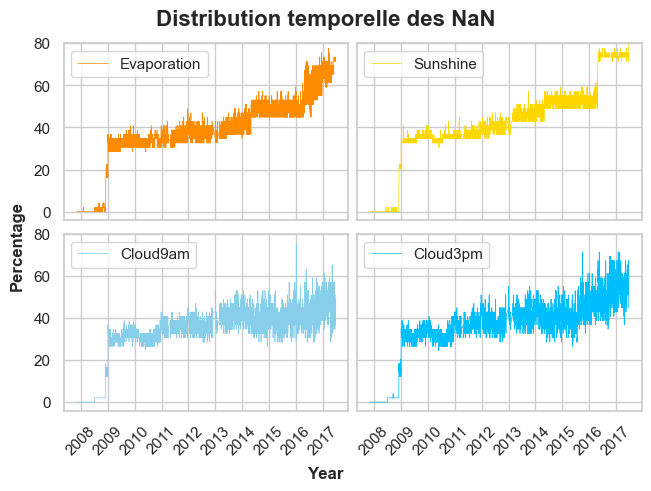

In [13]:
# Illustration des NaN dans les 4 variables gruyère en fonction de la date

## Initialisation de la toile
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, 
                                             ncols = 2, 
                                             sharex = True, 
                                             sharey = True, 
                                             layout = "constrained")

## Traçage

### `Evaporation`
ax1.plot(df_date_gruyere_isna_count_rate["Evaporation"], 
         label = "Evaporation", 
         color = "darkorange", 
         linewidth = 0.5)
ax1.legend()

### `Sunshine`
ax2.plot(df_date_gruyere_isna_count_rate["Sunshine"], 
         label = "Sunshine", 
         color = "gold", 
         linewidth = 0.5)
ax2.legend()

### `Cloud9am`
ax3.plot(df_date_gruyere_isna_count_rate["Cloud9am"], 
         label = "Cloud9am", 
         color = "skyblue", 
         linewidth = 0.5)
ax3.legend()

### `Cloud3pm`
ax4.plot(df_date_gruyere_isna_count_rate["Cloud3pm"], 
         label = "Cloud3pm", 
         color = "deepskyblue", 
         linewidth = 0.5)
ax4.legend()

## Mise en forme
plt.ylim(top = 80)

ax3.tick_params("x", labelrotation = 45)
ax4.tick_params("x", labelrotation = 45)

fig.supxlabel("Year", fontweight = "bold", fontsize = 12)
fig.supylabel("Percentage", fontweight = "bold", fontsize = 12)

plt.suptitle("Distribution temporelle des NaN", fontweight = "bold", fontsize = 16);

Pour toutes les 4 variables gruyère, le taux de NaN augmente globalement à partir de 2009.

## 7. Visualisation spatio-temporelle

In [14]:
# Décompte des NaN dans les 4 variables gruyère en fonction de la station météorologique et de la date

## Création du nouveau DataFrame `df_date_location` contenant uniquement les colonnes `Date` et `Location`
df_date_location = pd.concat([df_date, df_location], axis = 1)

## Affichage des résultats
df_date_location

,Date,Location
0,2008-12-01,Albury
1,2008-12-02,Albury
2,2008-12-03,Albury
3,2008-12-04,Albury
4,2008-12-05,Albury
...,...,...
145455,2017-06-21,Uluru
145456,2017-06-22,Uluru
145457,2017-06-23,Uluru
145458,2017-06-24,Uluru


In [15]:
# Décompte des NaN dans les 4 variables gruyère en fonction de la station météorologique et de la date

## Concaténation de `df_date_location` et `df_gruyere_isna` dans le nouveau DataFrame `df_date_location_gruyere_isna`
df_date_location_gruyere_isna = pd.concat([df_date_location, df_gruyere_isna], axis = 1)

## Affichage des résultats
df_date_location_gruyere_isna

,Date,Location,Evaporation,Sunshine,Cloud9am,Cloud3pm
0,2008-12-01,Albury,1,1,0,1
1,2008-12-02,Albury,1,1,1,1
2,2008-12-03,Albury,1,1,1,0
3,2008-12-04,Albury,1,1,1,1
4,2008-12-05,Albury,1,1,0,0
...,...,...,...,...,...,...
145455,2017-06-21,Uluru,1,1,1,1
145456,2017-06-22,Uluru,1,1,1,1
145457,2017-06-23,Uluru,1,1,1,1
145458,2017-06-24,Uluru,1,1,0,0


In [16]:
# Décompte des NaN dans les 4 variables gruyère en fonction de la station météorologique et de la date

## Regroupement des données dans des tableaux croisés par date (lignes) et station météorologique (colonnes)

space_time_pivot_table_Evaporation = pd.pivot_table(df_date_location_gruyere_isna, 
                                                    values = "Evaporation", 
                                                    index = "Date", 
                                                    columns = "Location", 
                                                    aggfunc = "sum")

space_time_pivot_table_Sunshine = pd.pivot_table(df_date_location_gruyere_isna, 
                                                 values = "Sunshine", 
                                                 index = "Date", 
                                                 columns = "Location", 
                                                 aggfunc = "sum")

space_time_pivot_table_Cloud9am = pd.pivot_table(df_date_location_gruyere_isna, 
                                                 values = "Cloud9am", 
                                                 index = "Date", 
                                                 columns = "Location", 
                                                 aggfunc = "sum")

space_time_pivot_table_Cloud3pm = pd.pivot_table(df_date_location_gruyere_isna, 
                                                 values = "Cloud3pm", 
                                                 index = "Date", 
                                                 columns = "Location", 
                                                 aggfunc = "sum")


In [17]:
# Décompte des NaN dans les 4 variables gruyère en fonction de la station météorologique et de la date

## Affichage des résultats pour `Evaporation`
space_time_pivot_table_Evaporation

Location,Adelaide,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,...,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
Date,,,,,,,,,,,,,,,,,,,,,
2007-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-11-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-11-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-11-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-11-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-21,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
2017-06-22,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
2017-06-23,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0


Les nouveaux `Nan` correspondent aux points de données qui n'existent pas dans le jeu de données d'origine et qui ont été générés ici par _broadcasting_.

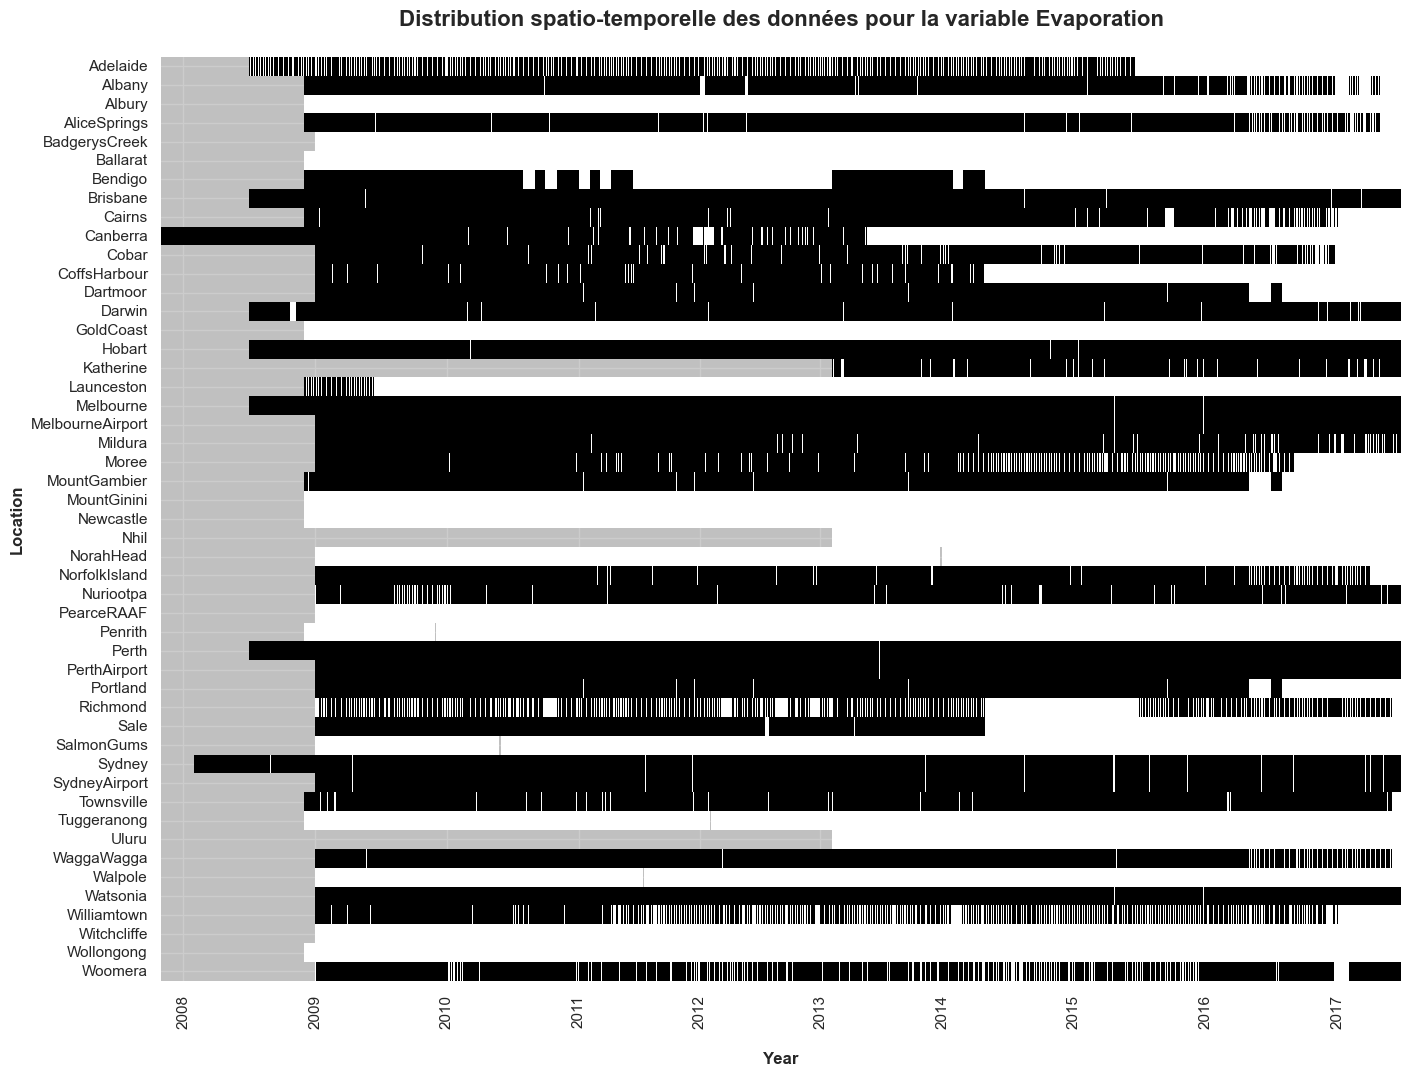

In [18]:
# Illustration des NaN dans `Evaporation` en fonction de la station météorologique et de la date

## Initialisation de la toile
plt.figure(figsize = (16, 12))

## Traçage
sns.set_style(rc = {'axes.facecolor': 'silver'})
ax = sns.heatmap(space_time_pivot_table_Evaporation.T, 
                 cmap = "Greys_r", 
                 cbar = False)

## Mise en forme

### Calculate January 1st tick positions and save corresponding years
timeline = df_date_gruyere_isna_counts.index.date

counter = 0
tick_pos = []
years = []

for element in timeline:
    if (element.month == 1) and (element.day == 1):
        tick_pos.append(counter)
        years.append(element.year)
    counter += 1

### Set labels
tick_labels = [f'{y}' for y in years]
ax.set_xticks(tick_pos)
ax.set_xticklabels(tick_labels, rotation = 90)
plt.xlabel("\nYear", fontweight = "bold")
plt.ylabel("Location", fontweight = "bold")

### Set title
plt.title("Distribution spatio-temporelle des données pour la variable Evaporation\n", fontweight = "bold", fontsize = 16);

In [19]:
# Ajouter légende :
# - noir : donnée renseignée
# - blanc : donnée non renseignée (NaN)
# - gris : donnée non existente dans jeu d'origine (paire `Date`-`Location` générée par _broadcasting_ uniquement pour le graphique)

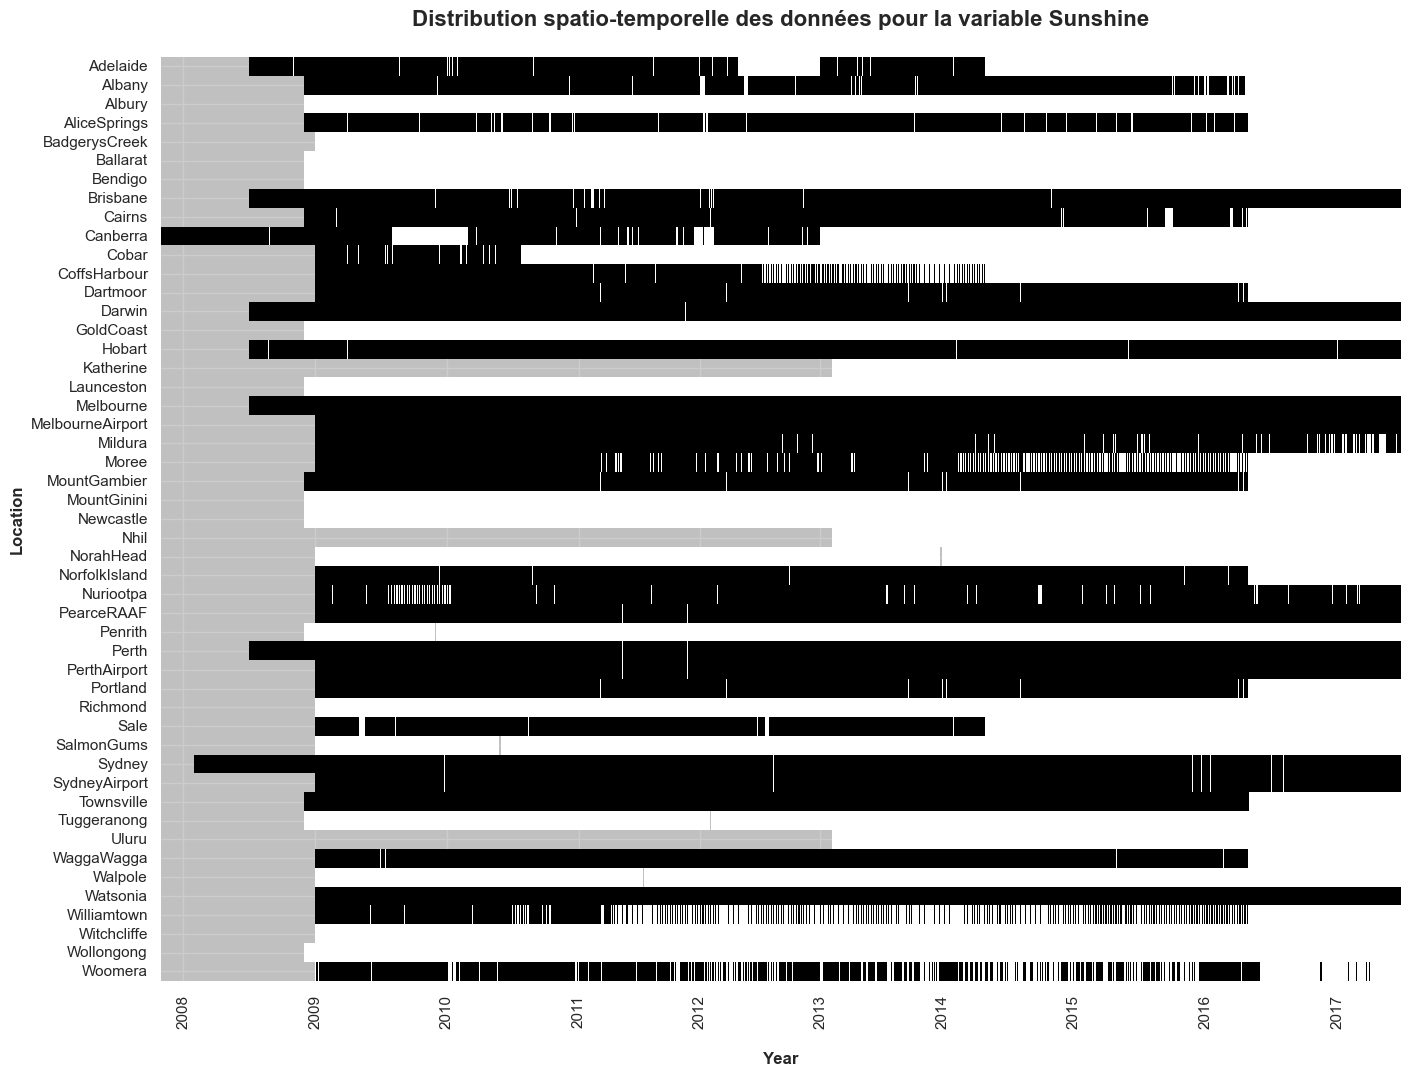

In [20]:
# Illustration des NaN dans `Sunshine` en fonction de la station météorologique et de la date

## Initialisation de la toile
plt.figure(figsize = (16, 12))

## Traçage
sns.set_style(rc = {'axes.facecolor': 'silver'})
ax = sns.heatmap(space_time_pivot_table_Sunshine.T, 
                 cmap = "Greys_r", 
                 cbar = False)

## Mise en forme

### Set labels
tick_labels = [f'{y}' for y in years]
ax.set_xticks(tick_pos)
ax.set_xticklabels(tick_labels, rotation = 90)
plt.xlabel("\nYear", fontweight = "bold")
plt.ylabel("Location", fontweight = "bold")

### Set title
plt.title("Distribution spatio-temporelle des données pour la variable Sunshine\n", fontweight = "bold", fontsize = 16);

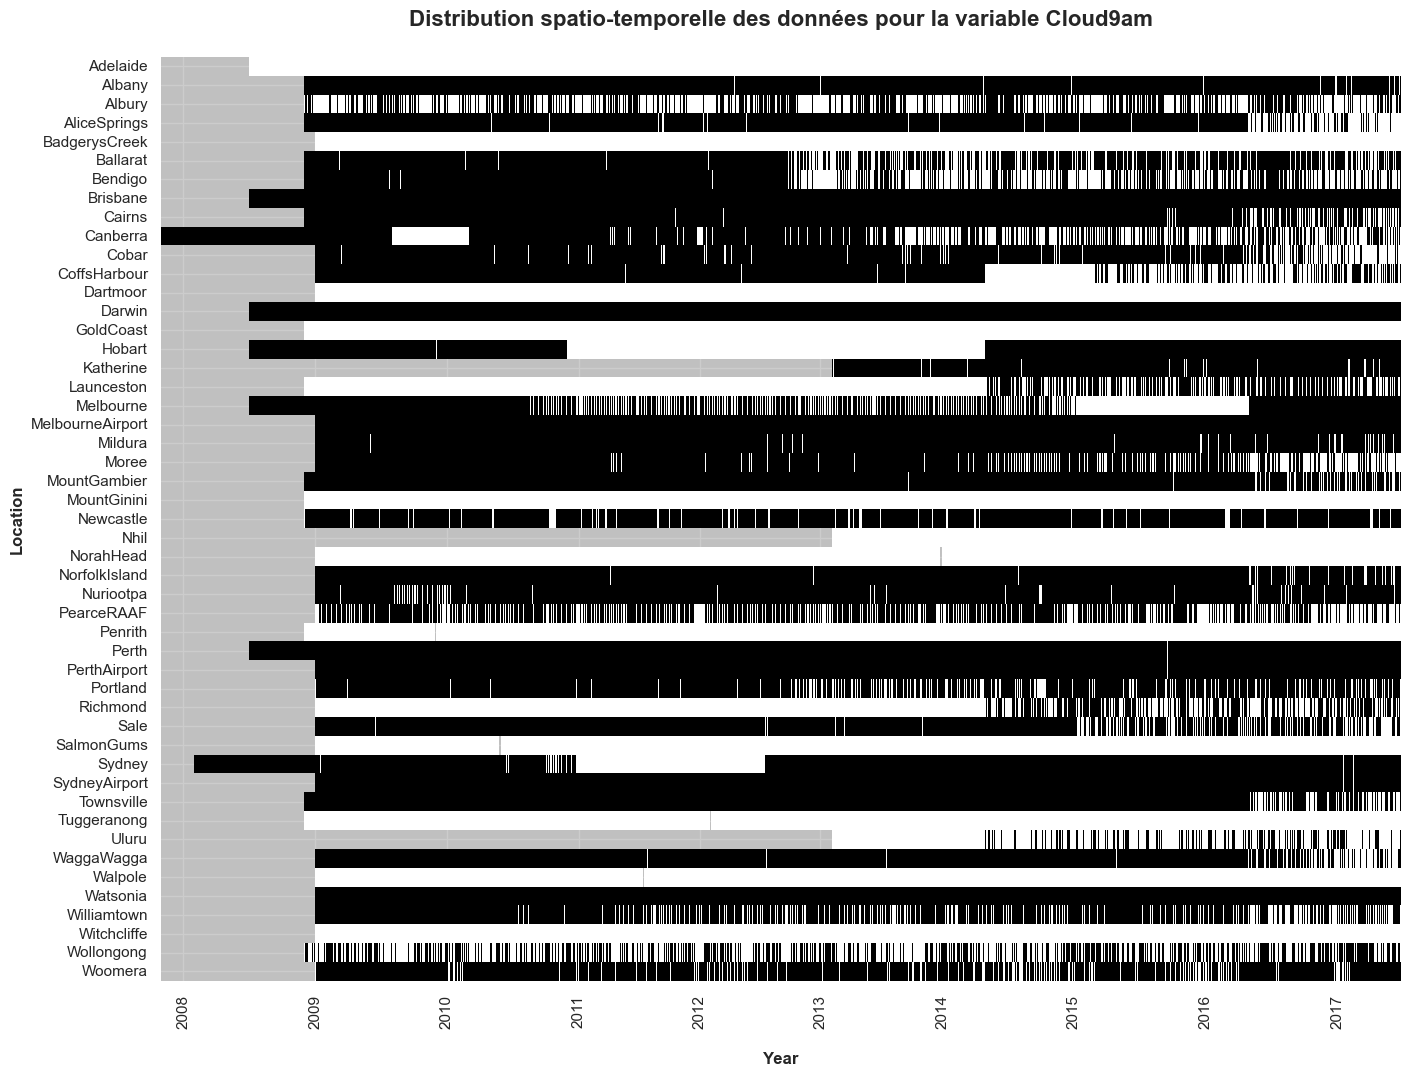

In [21]:
# Illustration des NaN dans `Cloud9am` en fonction de la station météorologique et de la date

## Initialisation de la toile
plt.figure(figsize = (16, 12))

## Traçage
sns.set_style(rc = {'axes.facecolor': 'silver'})
ax = sns.heatmap(space_time_pivot_table_Cloud9am.T, 
                 cmap = "Greys_r", 
                 cbar = False)

## Mise en forme

### Set labels
tick_labels = [f'{y}' for y in years]
ax.set_xticks(tick_pos)
ax.set_xticklabels(tick_labels, rotation = 90)
plt.xlabel("\nYear", fontweight = "bold")
plt.ylabel("Location", fontweight = "bold")

### Set title
plt.title("Distribution spatio-temporelle des données pour la variable Cloud9am\n", fontweight = "bold", fontsize = 16);

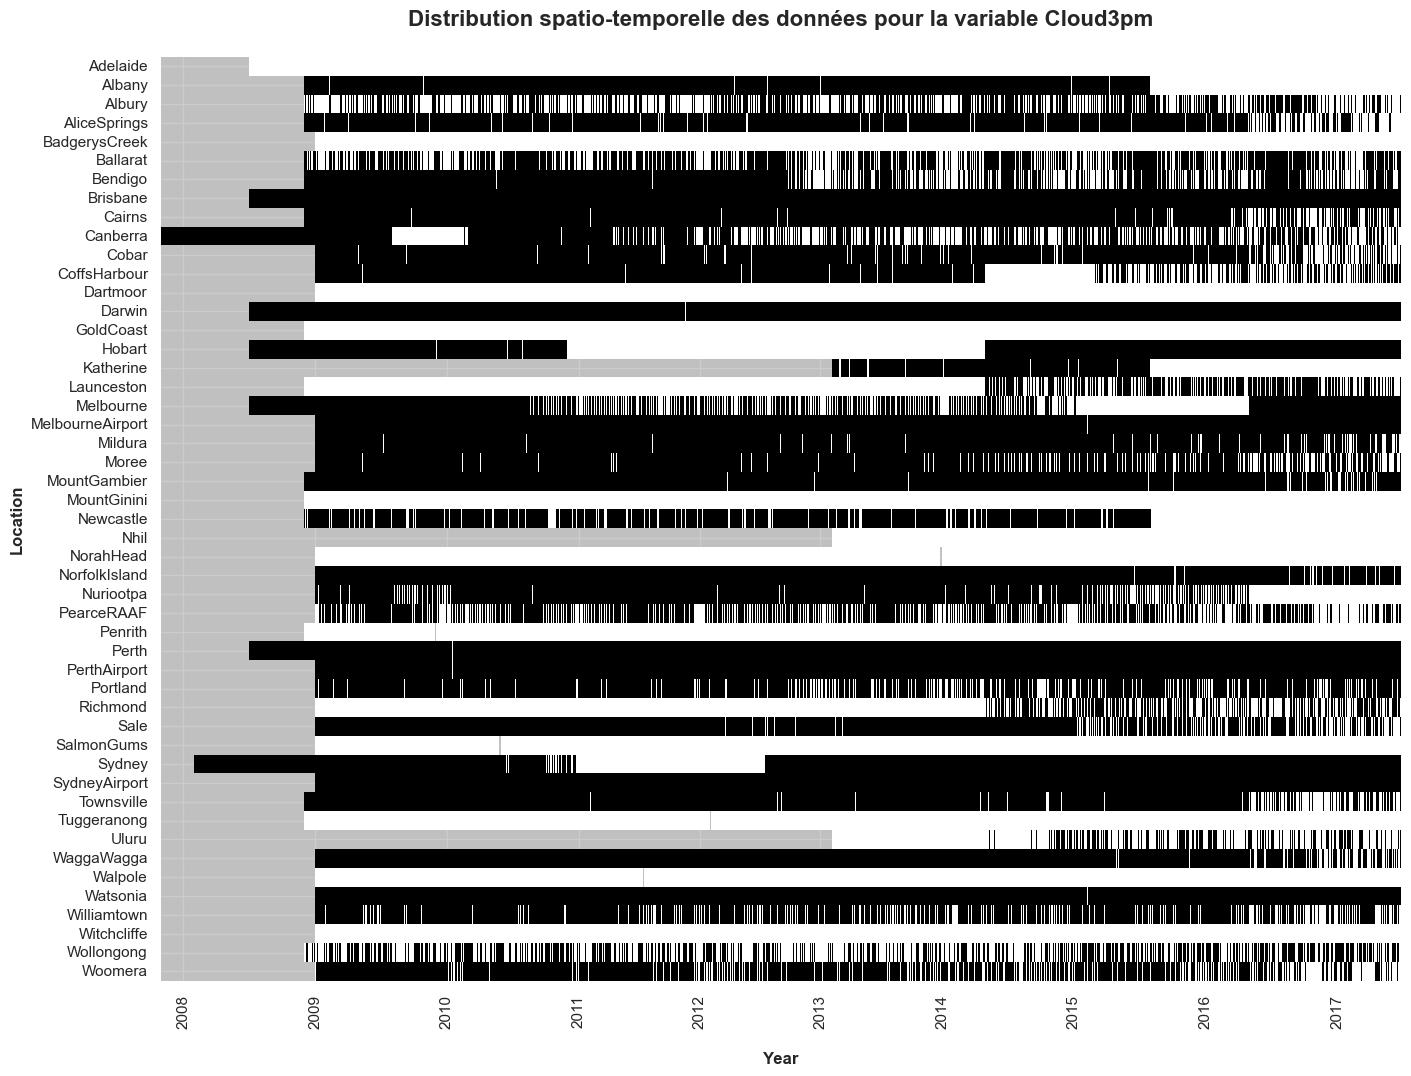

In [22]:
# Illustration des NaN dans `Cloud3pm` en fonction de la station météorologique et de la date

## Initialisation de la toile
plt.figure(figsize = (16, 12))

## Traçage
sns.set_style(rc = {'axes.facecolor': 'silver'})
ax = sns.heatmap(space_time_pivot_table_Cloud3pm.T, 
                 cmap = "Greys_r", 
                 cbar = False)

## Mise en forme

### Set labels
tick_labels = [f'{y}' for y in years]
ax.set_xticks(tick_pos)
ax.set_xticklabels(tick_labels, rotation = 90)
plt.xlabel("\nYear", fontweight = "bold")
plt.ylabel("Location", fontweight = "bold")

### Set title
plt.title("Distribution spatio-temporelle des données pour la variable Cloud3pm\n", fontweight = "bold", fontsize = 16);

## 8. Résultats

Alors que le taux de NaN des 4 variables gruyère est d'environ 40% pour l'ensemble du jeu de données (cf. § 2), ce chiffre monte à plus de 80% pour certaines stations météorologiques (cf. § 5).

Ces taux semblent également augmenter dans le temps (cf. § 6).

Néanmoins, l'exemple du traçage de la variable gruyère `Evaporation` dans les deux dimensions suggère la présence de fortes variations.

## 9. Recommandations

À partir des résultats ci-dessus, nous pouvons élaborer **3 stratégies de gestion des NaN** pour une colonne donnée, présentées ci-dessous en ordre croissant de finesse, mais aussi de complexité  :

- **Stratégie A :** remplacement par la moyenne / médiane / mode de la colonne, calculée sur l'ensemble du jeu de données. Cela équivaut à lisser les données sur toute la période d'étude et sur tout le territoire australien.

- **Stratégie B :** remplacement par la moyenne / médiane / mode de la colonne, calculée après regroupement des données par `Location`. Cela permet de prendre en compte les variations spatiales des paramètres météorologiques mais les lisse néanmoins dans le temps.

- **Stratégie C :** remplacement par interpolation, calculée après regroupement des données par `Location`, puis par `Date`. Cela permet de prendre en compte les variations spatiales et temporelles.

Afin de concilier la justesse des prédictions et les contraintes de réalisation du projet (notamment en matière de temps), nous pourrions choisir la stratégie à appliquer à une colonne donnée en fonction de son taux de NaN. Par exemple :

- Stratégie A : moins de 5%

- Stratégie B : entre 5% et 20%

- Stratégie C : plus de 20% _(variables gruyère)_